# <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. In this challenge, you have been tasked to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). You will be required to perform feature engineering then tune your most accurate model.

### b) Defining the Metric for Success

We will use the accuracy score as a metric for our success with 80% as success.

### c) Understanding the Context 

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

### d) Recording the Experimental Design

* Defining the Research Question
* Data Importation
* Data Exploration
* Data Cleaning
* Data Analysis (Univariate and Bivariate)
* Data Preparation
* Data Modeling
* Model Evaluation
* Challenging your Solution
* Recommendations / Conclusion 

### e) Data Relevance

The data is appropriate for the research question.

# <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [26]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)
pd.set_option('display.max_colwidth', None)
%matplotlib inline

In [27]:
# loading and previewing the train dataset
train = pd.read_csv('/content/train (7) (1).csv')
train.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
717,718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.500,E101,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S
274,275,1,3,"Healy, Miss. Hanora ""Nora""",female,NaN,0,0,370375,7.750,NaN,Q


In [28]:
# loading and previewing the test dataset
test = pd.read_csv('/content/test (2) (1).csv')
test.sample(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
380,1272,3,"O'Connor, Mr. Patrick",male,NaN,0,0,366713,7.7500,NaN,Q
292,1184,3,"Nasr, Mr. Mustafa",male,NaN,0,0,2652,7.2292,NaN,C
200,1092,3,"Murphy, Miss. Nora",female,NaN,0,0,36568,15.5000,NaN,Q


In [29]:
# checking the datasets' shapes
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (891, 12)
Test shape: (418, 11)


In [30]:
# checking data types of Train
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [31]:
# checking data types of Test
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [32]:
# dropping duplicates, if any
train.drop_duplicates(inplace = True)
test.drop_duplicates(inplace = True)

print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (891, 12)
Test shape: (418, 11)


In [33]:
# checking for missing data in Train
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
# replacing missing 'Age' values with column mean and 'Embarked' with mode
train['Age'].fillna(train['Age'].mean(), inplace = True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)

# dropping 'Cabin' since it has too many missing values to impute
train.drop(columns = ['Cabin'], inplace = True)

# confirming we don't have any missing values
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [35]:
# checking for missing data in Test
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [36]:
# repacing missing 'Age' and 'Fare' values with their respective mean
test['Age'].fillna(test['Age'].mean(), inplace = True)
test['Fare'].fillna(test['Fare'].mean(), inplace = True)

# dropping 'Cabin' since it has too many missing values to impute
test.drop(columns = ['Cabin'], inplace = True)

# confirming we don't have any missing values
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

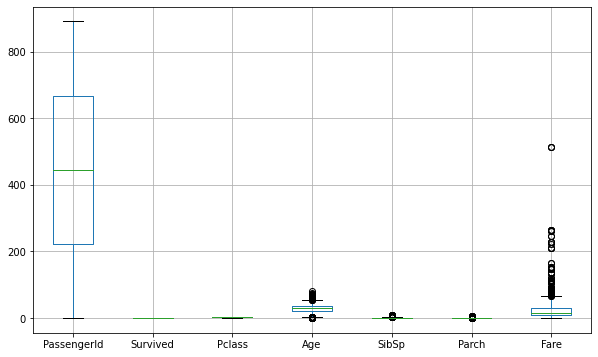

In [37]:
# visualizing the distribution of outliers - Train
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize = (10, 6))
train.boxplot()
plt.show()

There are several variables with outliers - Age, SibSp ,Parch & Fare

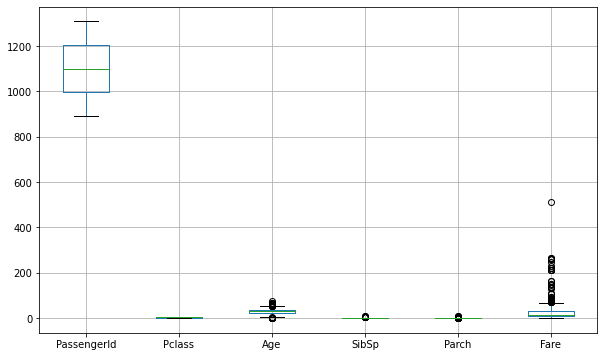

In [38]:
# visualizing the distribution of outliers - Test
plt.figure(figsize = (10, 6))
test.boxplot()
plt.show()

Similarly  for the test dataset, there are several variables with outliers - Age, SibSp ,Parch & Fare

# <font color='#2F4F4F'>3. Data Analysis</font>

## 3.1 Feature Engineering

### 3.1.1 Getting the Title

In [39]:
# Train
# extracting the title from the name
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.')

# dropping 'Name'
train.drop(columns = ['Name'], inplace = True)

# previewing the changes
train.sample(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
539,540,1,1,female,22.0,0,2,13568,49.5000,C,Miss
209,210,1,1,male,40.0,0,0,112277,31.0000,C,Mr
869,870,1,3,male,4.0,1,1,347742,11.1333,S,Master


In [40]:
# Test
# extracting the title from the name
test['Title'] = test['Name'].str.extract('([A-Za-z]+)\.')

# dropping 'Name'
test.drop(columns = ['Name'], inplace = True)

# previewing the changes
test.sample(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
283,1175,3,female,9.00000,1,1,2650,15.2458,C,Miss
65,957,2,female,30.27259,0,0,F.C.C. 13534,21.0000,S,Mrs
359,1251,3,female,30.00000,1,0,349910,15.5500,S,Mrs


### 3.1.2 Getting the Family Size

In [41]:
# Train
# add new column 'FamilySize' which consists of SibSp plus Parch plus 1 (the passenger himself/herself)

train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

In [42]:
train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1


In [43]:
# Test
# add new column 'FamilySize' which consists of SibSp plus Parch plus 1 (the passenger himself/herself)

test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [44]:
test.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,892,3,male,34.5,0,0,330911,7.8292,Q,Mr,1
1,893,3,female,47.0,1,0,363272,7.0000,S,Mrs,2
2,894,2,male,62.0,0,0,240276,9.6875,Q,Mr,1


### 3.1.3 Getting the Fare per Person

In [45]:
# Train
# create new variable 'FarePerPerson' which is Fare / FamilySize

train['FarePerPerson'] = train['Fare'] / train['FamilySize']

In [46]:
train.sample(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,FarePerPerson
323,324,1,2,female,22.0,1,1,248738,29.00,S,Mrs,3,9.666667
616,617,0,3,male,34.0,1,1,347080,14.40,S,Mr,3,4.800000
11,12,1,1,female,58.0,0,0,113783,26.55,S,Miss,1,26.550000


In [47]:
# Test
# create new variable 'FarePerPerson' which is Fare / FamilySize

test['FarePerPerson'] = test['Fare'] / test['FamilySize']

In [48]:
test.sample(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,FarePerPerson
10,902,3,male,30.27259,0,0,349220,7.8958,S,Mr,1,7.895800
342,1234,3,male,30.27259,1,9,CA. 2343,69.5500,S,Mr,11,6.322727
384,1276,2,male,30.27259,0,0,SC/PARIS 2159,12.8750,S,Mr,1,12.875000


In [49]:
# dropping unneeded columns 'PassengerId' and 'Ticket'
train.drop(columns = ['PassengerId', 'Ticket'], inplace = True)
test.drop(columns = ['PassengerId', 'Ticket'], inplace = True)

# dropping duplicates
train.drop_duplicates(inplace = True)
test.drop_duplicates(inplace = True)

# preview the datasets' shapes
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (787, 11)
Test shape: (383, 10)


In [50]:
# saving to clean CSV files
train.to_csv('train_clean.csv', index = False)
test.to_csv('test_clean.csv', index = False)

## 3.2 Univariate Analysis 

### 3.2.1 Train dataset

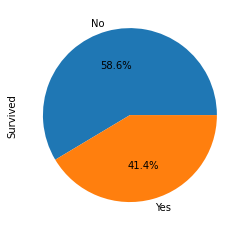

In [51]:
# distribution of those who survived vs those who didn't
plt.figure(figsize = (4, 4))
train.Survived.value_counts().plot(kind = 'pie', autopct = '%0.1f%%', labels = ["No", "Yes"])
plt.show()

A little over half of the passengers did not survive the sinking of the ship.

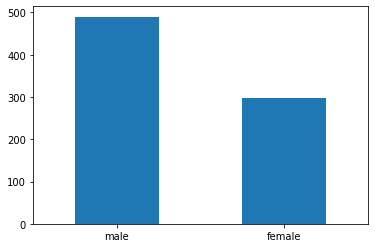

In [52]:
# distribution of gender
plt.figure(figsize = (6, 4))
train.Sex.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

There are more male passengers than female passengers in this dataset.

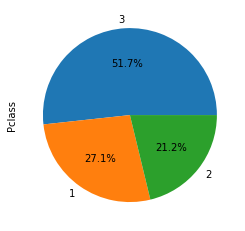

In [53]:
# distribution of class
plt.figure(figsize = (4, 4))
train.Pclass.value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
plt.show()

Majority of the passengers are in 3rd class followed by those in 1st class.

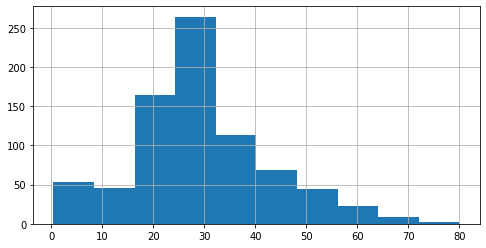

In [54]:
# distribution of age
plt.figure(figsize = (8, 4))
train.Age.hist()
plt.show()

Majority of the passengers are between 24-31 years. Minority are 55 and above.

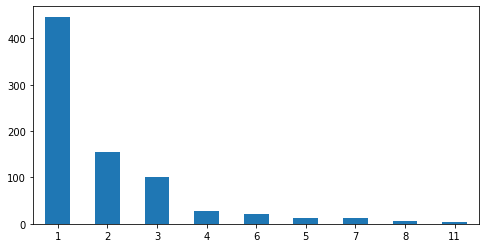

In [55]:
# distribution of family size
plt.figure(figsize = (8, 4))
train.FamilySize.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Majority of the passengers were travelling alone. The second and third biggest portion of the passengers had 1 and 2 other family members with them respectively.

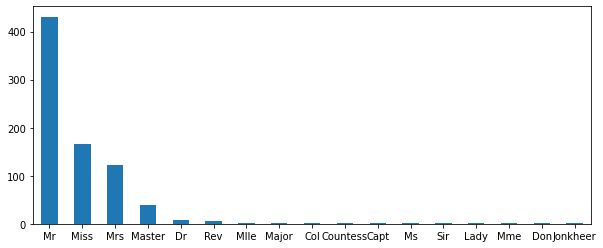

In [56]:
# distribution by title
plt.figure(figsize = (10, 4))
train.Title.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Common titles such as 'Mr.', 'Mrs.', and 'Miss' made up the vast majority of the titles used.

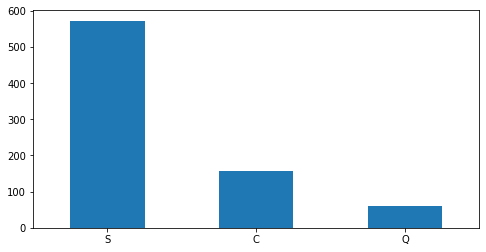

In [57]:
# distribution of 'Embarked'
plt.figure(figsize = (8, 4))
train.Embarked.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Majority of the passengers embarked at point S.

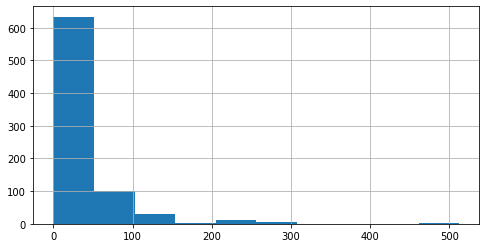

In [58]:
# distribution of fare
plt.figure(figsize = (8, 4))
train.Fare.hist()
plt.show()

Most of the fare prices are between 0-100.

### 3.2.2 Test dataset

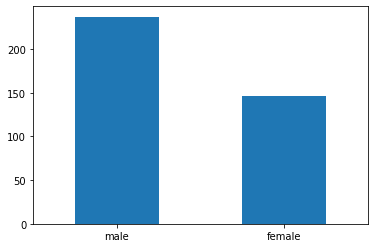

In [59]:
# distribution of gender
plt.figure(figsize = (6, 4))
test.Sex.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

There are more male passengers than female passengers in this dataset.

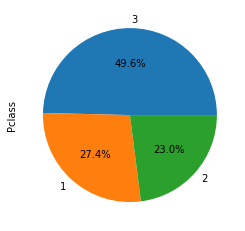

In [60]:
# distribution of class
plt.figure(figsize = (4, 4))
test.Pclass.value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
plt.show()

Majority of the passengers are in 3rd class followed by those in 1st class.

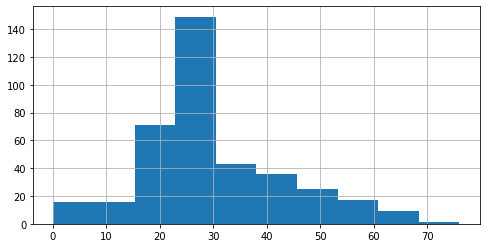

In [61]:
# distribution of age
plt.figure(figsize = (8, 4))
test.Age.hist()
plt.show()

Majority of the passengers are between 24-30 years. Minority are 69 and above.

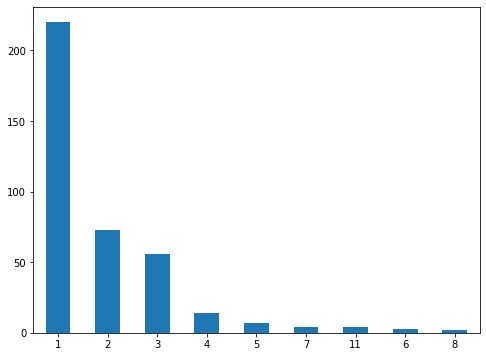

In [62]:
# distribution of family size
plt.figure(figsize = (8, 6))
test.FamilySize.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Majority of the passengers were travelling alone. The second and third biggest portion of the passengers had 1 and 2 other family members with them respectively.

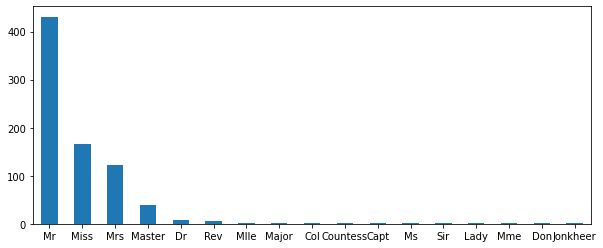

In [63]:
# distribution by title
plt.figure(figsize = (10, 4))
train.Title.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Common titles such as 'Mr.', 'Mrs.', and 'Miss' made up the vast majority of the titles used.

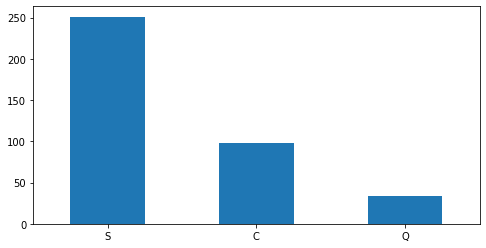

In [64]:
# distribution of 'Embarked'
plt.figure(figsize = (8, 4))
test.Embarked.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Majority of the passengers embarked at point S.

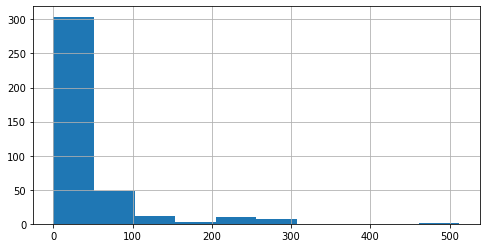

In [65]:
# distribution of fare
plt.figure(figsize = (8, 4))
test.Fare.hist()
plt.show()

Most of the prices are between 0-100.

## 3.3 Bivariate Analysis

We will look at how the other variables relate to the target variable ('Survived') in the Train dataset.

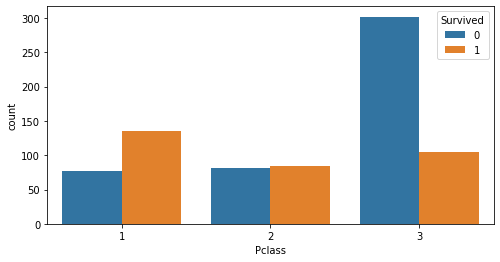

In [66]:
# distribution of Survived by class
plt.figure(figsize = (8, 4))
sns.countplot(train['Pclass'], hue = train['Survived'])
plt.show()

Majority of those who survived were in 1st class. Majority of those who died were in 3rd class.

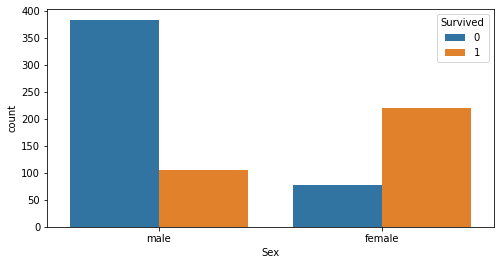

In [67]:
# distribution of Survived by gender
plt.figure(figsize = (8, 4))
sns.countplot(train['Sex'], hue = train['Survived'])
plt.show()

Majority of those who survived were female while majority of those who died were male.

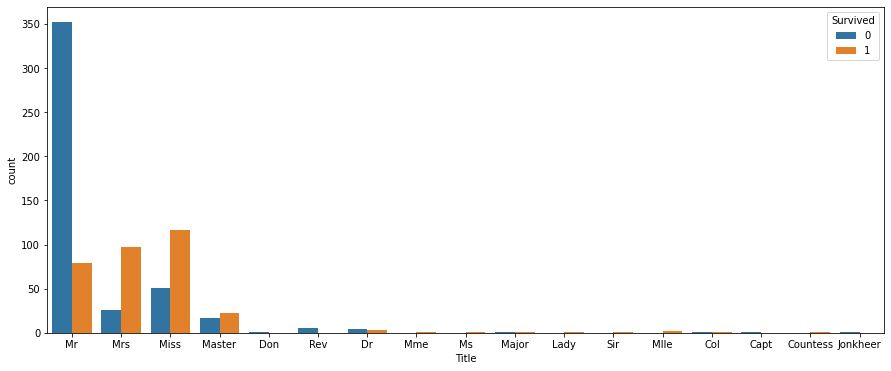

In [68]:
# distribution of Survived by title
plt.figure(figsize = (15, 6))
sns.countplot(train['Title'], hue = train['Survived'])
plt.show()

Majority of those who survived were the women, including those with superior titles like Mme, Mlle, and Countess. Majority of those who died were men, including those with superior titles like Col, Capt, and Jonkheer.

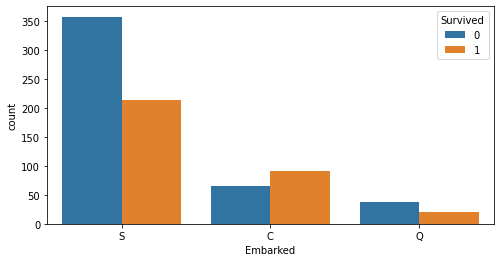

In [69]:
# distribution of Survived by point of embarkment
plt.figure(figsize = (8, 4))
sns.countplot(train['Embarked'], hue = train['Survived'])
plt.show()

Those who embarked at point S survived and died more than their counterparts who embarked at points C and Q.

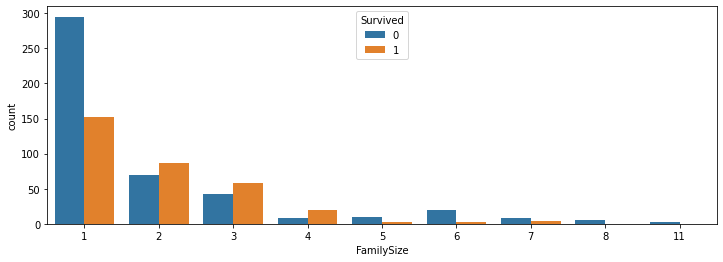

In [70]:
# distribution of Survived by family size
plt.figure(figsize = (12, 4))
sns.countplot(train['FamilySize'], hue = train['Survived'])
plt.show()

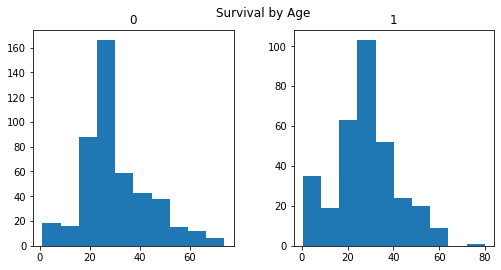

In [71]:
# survived by age
train.hist('Age', by = 'Survived', rot = 0, figsize = (8, 4))
plt.suptitle("Survival by Age")
plt.show()

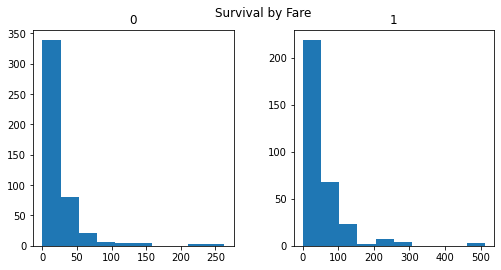

In [72]:
# survived by Fare
train.hist('Fare', by = 'Survived', rot = 0, figsize = (8, 4))
plt.suptitle("Survival by Fare")
plt.show()

## 3.4 Feature Encoding

In [73]:
from sklearn.preprocessing import LabelEncoder

#Encoding Sex
le_sex = LabelEncoder().fit(train['Sex'].unique())
sex_classes = le_sex.classes_
train['Sex'] = le_sex.transform(train['Sex'].values)
test['Sex'] = le_sex.transform(test['Sex'].values)

#Encoding Embarked
le_embarked = LabelEncoder().fit(train['Embarked'].unique())
embarked_classes = le_embarked.classes_
train['Embarked'] = le_embarked.transform(train['Embarked'].values)
test['Embarked'] = le_embarked.transform(test['Embarked'].values)


#Encoding Title
le_train_title = LabelEncoder().fit(train['Title'].unique())
train_title_classes = le_train_title.classes_
train['Title'] = le_train_title.transform(train['Title'].values)

#Encode Title: Test
le_test_title = LabelEncoder().fit(test['Title'].unique())
test_title_classes = le_test_title.classes_
test['Title'] = le_test_title.transform(test['Title'].values)


#Previewing our modified datatypes
print("Train:")
print(train.dtypes)
print()
print("Test:")
print(test.dtypes)

Train:
Survived           int64
Pclass             int64
Sex                int64
Age              float64
SibSp              int64
Parch              int64
Fare             float64
Embarked           int64
Title              int64
FamilySize         int64
FarePerPerson    float64
dtype: object

Test:
Pclass             int64
Sex                int64
Age              float64
SibSp              int64
Parch              int64
Fare             float64
Embarked           int64
Title              int64
FamilySize         int64
FarePerPerson    float64
dtype: object


# <font color='#2F4F4F'>4. Data Preparation</font>

In [74]:
# splitting Train data into features (X) and label (Y)

from sklearn.model_selection import train_test_split

train_properties = list(train.columns.values)
train_properties.remove('Survived')
X = train[train_properties]
Y = train['Survived']

In [75]:
# splitting into 75-25 training and test sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)


In [76]:
# performing feature scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit and transform X_train, transform X_test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Train shape:", train.shape)
print("Test shape:", test.shape)

print("X_val shape:", train.shape)
print("y_val shape:", test.shape)

Train shape: (787, 11)
Test shape: (383, 10)
X_val shape: (787, 11)
y_val shape: (383, 10)


##5. Data Modeling

In [80]:
# Neural networks library and modules
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

## 5.1 Normal Modeling

In [81]:
# Neural networks library and modules

#Defining our ANN and compiling it 
ann_classifier_1 = Sequential() 
ann_classifier_1.add(Dense(units = 10, input_dim = 10, activation = 'relu'))
ann_classifier_1.add(Dropout(0.3, seed = 2)) 
ann_classifier_1.add(Dense(units = 1))


# Compiling the model

ann_classifier_1.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

# Fitting the model

ann_classifier_1.fit(X_train, Y_train, epochs=300)



Epoch 1/300
16/16 [==============================] - 1s 2ms/step - loss: 1.3811 - accuracy: 0.5984
Epoch 2/300
16/16 [==============================] - 0s 2ms/step - loss: 1.0338 - accuracy: 0.5805
Epoch 3/300
16/16 [==============================] - 0s 2ms/step - loss: 1.0022 - accuracy: 0.6064
Epoch 4/300
16/16 [==============================] - 0s 1ms/step - loss: 0.7469 - accuracy: 0.5944
Epoch 5/300
16/16 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5905
Epoch 6/300
16/16 [==============================] - 0s 2ms/step - loss: 0.6680 - accuracy: 0.5944
Epoch 7/300
16/16 [==============================] - 0s 2ms/step - loss: 0.5976 - accuracy: 0.5805
Epoch 8/300
16/16 [==============================] - 0s 2ms/step - loss: 0.5038 - accuracy: 0.6203
Epoch 9/300
16/16 [==============================] - 0s 2ms/step - loss: 0.4610 - accuracy: 0.6243
Epoch 10/300
16/16 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.6561
Epoch 11/

In [82]:
# Evaluating our model

loss, accuracy = ann_classifier_1.evaluate(X_test, Y_test)
print('Model with One Dense Layer - Accuracy:', accuracy)

5/5 [==============================] - 0s 2ms/step - loss: 0.1371 - accuracy: 0.8038
Model with One Dense Layer - Accuracy: 0.8037974834442139


ANN with 2 dense layers

## 5.2 Modeling with Grid Search

In [83]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

For this example, we will use the Runtime type -> TPU (Tensorfolow Processing Unit). To change run type go to Menu -> Runtime -> Change runtime type -> TPU.

In [ ]:
# Tuning the no. of epochs 
# ---
# epochs = [50, 100, 500]
# ---

# Creating our ANN 

def create_model():
  classifier = Sequential()
  classifier.add(Dense(units = 10, input_dim = 10, activation = "softmax"))
  classifier.add(Dropout(0.3, seed = 2))
  classifier.add(Dense(units = 10, activation = 'relu'))
  classifier.add(Dropout(0.2, seed = 2))
  classifier.add(Dense(units = 1, activation = "sigmoid"))

  
# Compile the model
  classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Return the model
  return classifier

# Creating the KerasClassifier instance
model_epochs_batches = KerasClassifier(build_fn = create_model)

# Performing grid search

epochs = [50, 100, 500]
#epochs = [50, 150, 200, 250, 300]
batch_size = [32, 40, 48, 56, 60]
param_grid = dict(batch_size = batch_size, epochs = epochs) 
grid = GridSearchCV(estimator = model_epochs_batches, param_grid = param_grid, scoring = 'accuracy', cv = 5)
grid_result = grid.fit(X_train, Y_train)


# Summarizing our grid search results

epochs = [50, 100, 500]
print("Best Accuracy Score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Streaming output truncated to the last 5000 lines.
7/7 [==============================] - 1s 4ms/step - loss: 0.6887 - accuracy: 0.5398
Epoch 2/500
7/7 [==============================] - 0s 3ms/step - loss: 0.6856 - accuracy: 0.5622
Epoch 3/500
7/7 [==============================] - 0s 3ms/step - loss: 0.6851 - accuracy: 0.5473
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6766 - accuracy: 0.5846
Epoch 5/500
7/7 [==============================] - 0s 3ms/step - loss: 0.6740 - accuracy: 0.5821
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6731 - accuracy: 0.5746
Epoch 7/500
7/7 [==============================] - 0s 3ms/step - loss: 0.6733 - accuracy: 0.5597
Epoch 8/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6703 - accuracy: 0.5945
Epoch 9/500
7/7 [==============================] - 0s 3ms/step - loss: 0.6637 - accuracy: 0.6144
Epoch 10/500
7/7 [==============================] - 0s 3ms/step - loss: 0.6605 - accurac

The first ANN had an accuracy score of 72.92% , now we Optimize the model

## 5.2.1 Optimized Model

In [84]:
# Define the ANN with optimal parameters
optimal_model = Sequential()
optimal_model.add(Dense(units = 10, input_dim = 10, activation = 'softmax'))
optimal_model.add(Dropout(0.3, seed = 2)) 
optimal_model.add(Dense(units = 10, activation = 'tanh'))
optimal_model.add(Dropout(0.2, seed = 2))
optimal_model.add(Dense(units = 1, activation = "sigmoid"))



In [85]:
# Set the learning rate for our optimized algorithm 
optimizer = keras.optimizers.Adam(learning_rate=0.01)

In [86]:
 # Compile the model
optimal_model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [87]:
# Fit the model
optimal_model.fit(X_train, Y_train, epochs = 200, batch_size = 48)

Epoch 1/200
11/11 [==============================] - 1s 3ms/step - loss: 0.6712 - accuracy: 0.5765
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 0.6360 - accuracy: 0.6262
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 0.6065 - accuracy: 0.6680
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 0.5519 - accuracy: 0.7256
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 0.5543 - accuracy: 0.7197
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 0.5176 - accuracy: 0.7435
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 0.5027 - accuracy: 0.7853
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 0.5012 - accuracy: 0.7813
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4919 - accuracy: 0.7535
Epoch 10/200
11/11 [==============================] - 0s 3ms/step - loss: 0.4891 - accuracy: 0.7813
Epoch 11/

In [88]:
# Evaluate the model
loss, accuracy = optimal_model.evaluate(X_test, Y_test)
print('Accuracy:', accuracy)

5/5 [==============================] - 0s 5ms/step - loss: 0.4513 - accuracy: 0.8038
Accuracy: 0.8037974834442139


# <font color='#2F4F4F'>5. Summary of Findings</font>

The first ANN had an accuracy score of **72.92**%. After Optimizing the model the acurracy increased to **80.38%**

Optimal parameters after Grid Search were as follows: -


*   batch_size: 48
*   epochs: 200
*   learning_rate: 0.01
*   optimizer: adam


# <font color='#2F4F4F'>6. Challenging your Solution</font>

### a) Did we have the right question?

Yes

### b) Did we have the right data?

Yes 

### c) What can be done to improve the solution?
Introduce more training data

Handle outliers
